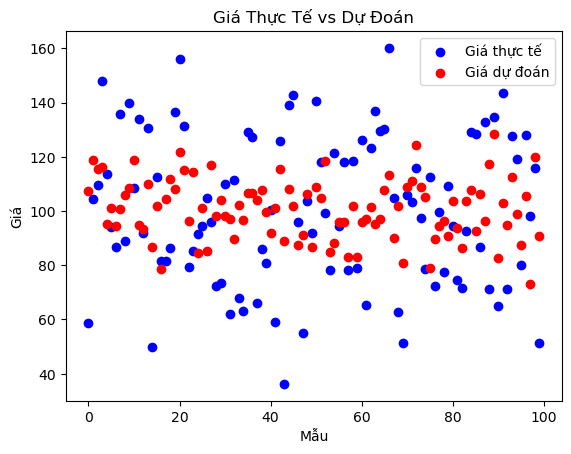

Giá dự đoán: 95.65


In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu
def doc_du_lieu(file_name):
    with open(file_name, mode='r', encoding='utf-8-sig') as file:
        reader = csv.DictReader(file)
        data = [row for row in reader]
    return data

data = doc_du_lieu('data_train.csv')

# Chuyển đổi dữ liệu
def chuyen_doi_du_lieu(data):
    khoi_luong = []
    loai = {'Rau': 0, 'Củ': 1, 'Quả': 2}
    mua = {'Xuân': 0, 'Hạ': 1, 'Thu': 2, 'Đông': 3}
    gia = []

    for row in data:
        khoi_luong.append(float(row['Khối_lượng']))
        gia.append(float(row['Giá']))
    
    X = np.array([[khoi_luong[i], loai[data[i]['Loại']], mua[data[i]['Mùa']]] for i in range(len(data))])
    y = np.array(gia)
    return X, y

X, y = chuyen_doi_du_lieu(data)

# Hồi quy tuyến tính
def linear_regression(X, y):
    X = np.c_[np.ones(X.shape[0]), X]  # Thêm cột 1
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

beta = linear_regression(X, y)

# Dự đoán
def predict(X, beta):
    X = np.c_[np.ones(X.shape[0]), X]  # Thêm cột 1
    return X @ beta

y_pred_manual = predict(X, beta)

# Vẽ biểu đồ
plt.scatter(range(len(y)), y, color='blue', label='Giá thực tế')
plt.scatter(range(len(y_pred_manual)), y_pred_manual, color='red', label='Giá dự đoán')
plt.title('Giá Thực Tế vs Dự Đoán')
plt.xlabel('Mẫu')
plt.ylabel('Giá')
plt.legend()
plt.show()

# Hàm nhập dữ liệu mới
def du_doan_gia_moi(khoi_luong, loai, mua, beta):
    loai_map = {'Rau': 0, 'Củ': 1, 'Quả': 2}
    mua_map = {'Xuân': 0, 'Hạ': 1, 'Thu': 2, 'Đông': 3}
    X_new = np.array([1, khoi_luong, loai_map[loai], mua_map[mua]])
    gia_du_doan = X_new @ beta
    print(f"Giá dự đoán: {gia_du_doan:.2f}")

# Ví dụ nhập dữ liệu mới
du_doan_gia_moi(5, 'Rau', 'Xuân', beta)